In [30]:
import numpy as np 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [31]:
data = pd.read_csv("C:/Users/91994/OneDrive/Documents/machine learning project/archive (1)/data.csv")
data
data = data.drop(data.columns[0], axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [33]:
maxval = data.values.max()
minval = data.values.min()
print(maxval)
print(minval)

2047
-1885


In [34]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [35]:
data.isnull()  #check whether there are null values 
data.isnull().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64

In [36]:
print(data['y'].value_counts())  #before changing {2,3,4,5 as 0}

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64


In [37]:
# Separate Data into Features and Target
x = data.drop(columns = ['y'])
y = data['y']



In [38]:
data.shape



(11500, 179)

In [39]:
x.shape,y.shape

((11500, 178), (11500,))

In [40]:
x.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1860.000000,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-8.000000,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,35.000000,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,2047.000000,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000


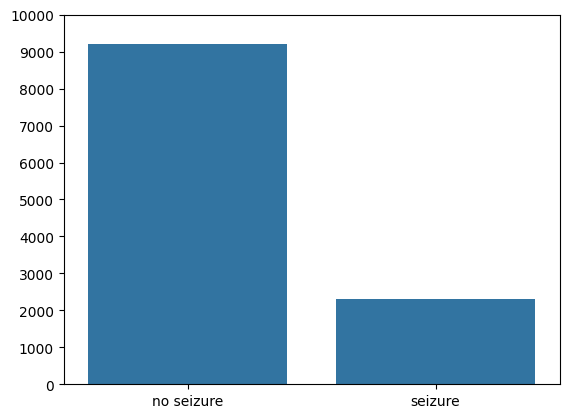

In [41]:
labels = ['no seizure','seizure']

seizure = y[y.values ==1].shape[0]
no_seizure = y[y.values > 1].shape[0]

sn.barplot(x=labels, y=[no_seizure,seizure])
# plt.ylim(0, max(no_seizure, seizure) + 1000) 
plt.yticks(range(0, max(no_seizure, seizure) + 1000, 1000))
plt.show()



In [42]:
y = y.values
y[y>1]=0

In [43]:
y
print(data['y'].value_counts())  #after changing {2,3,4,5 as 0}


y
0    9200
1    2300
Name: count, dtype: int64


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,
                                                    random_state = 0)

In [45]:
x_train.shape, x_test.shape

((8050, 178), (3450, 178))

In [46]:
scaler = StandardScaler()

x = scaler.fit_transform(x)
print(x)

x_train = scaler.fit_transform(x_train)
print(x_train)

x_test = scaler.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)


[[ 0.88505134  1.20992878  1.46276429 ... -0.63414367 -0.43329036
  -0.23539922]
 [ 2.40057718  2.36619038  2.23944096 ...  1.02342937  0.95424076
   0.85653664]
 [-0.12328657 -0.16915405 -0.22513147 ... -0.13687176 -0.13859348
  -0.14440456]
 ...
 [ 0.1544592   0.10184476 -0.01720228 ...  0.0657205   0.07015014
   0.02545213]
 [-0.17159018 -0.08484331  0.00725997 ...  0.49546166  0.43852123
   0.40762968]
 [ 0.24502848  0.31262161  0.41088722 ...  0.0657205   0.08856869
   0.19530882]]
[[ 0.18051598  0.26122185  0.3283767  ...  0.35629561  0.49270777
   0.55376676]
 [-0.40760532 -0.3722213  -0.18076948 ... -0.24488298 -0.24555716
  -0.01881491]
 [-0.27233742 -0.2715808  -0.28381097 ...  0.06500289  0.03129219
   0.01164156]
 ...
 [ 0.17463477  0.18426147  0.21927394 ... -0.20149896 -0.19018729
  -0.15282339]
 [ 1.74491864  1.7353092   1.94673419 ... -0.06514917 -0.9961265
  -1.80965545]
 [-0.6252102   0.3914625   1.71034489 ... -3.36233485 -3.02020284
  -2.21777217]]


In [47]:
data  #after all the removal of first column and the y column updation our dataset looks like this

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,0


In [48]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
count,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03,...,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03,8.050000e+03
mean,-5.737302e-18,-1.478458e-17,-3.309982e-18,-4.192643e-18,3.089316e-18,-6.840629e-18,5.295971e-18,-1.765324e-18,-4.413309e-18,-8.826618e-19,...,9.157616e-18,-5.737302e-18,2.096322e-18,3.530647e-18,5.737302e-18,-9.709280e-18,4.413309e-18,-1.323993e-17,-2.647985e-18,7.061294e-18
std,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,...,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00
min,-1.074678e+01,-1.081515e+01,-1.106074e+01,-1.132786e+01,-1.102650e+01,-1.081902e+01,-1.119638e+01,-1.074078e+01,-1.117072e+01,-1.160599e+01,...,-1.107351e+01,-1.112506e+01,-1.095097e+01,-9.526479e+00,-1.002749e+01,-9.843981e+00,-9.996539e+00,-1.096693e+01,-1.055666e+01,-1.107451e+01
25%,-2.488126e-01,-2.538207e-01,-2.641119e-01,-2.789353e-01,-2.815316e-01,-2.938180e-01,-2.935038e-01,-3.010297e-01,-3.031047e-01,-3.062303e-01,...,-2.717723e-01,-2.647395e-01,-2.512915e-01,-2.457372e-01,-2.449637e-01,-2.490571e-01,-2.619764e-01,-2.634761e-01,-2.640138e-01,-2.685580e-01
50%,2.466383e-02,3.034070e-02,1.925223e-02,1.101401e-02,-3.324659e-03,-1.570049e-02,-1.142704e-02,-1.608879e-02,-1.070250e-02,-7.675379e-03,...,3.507344e-03,1.096411e-02,1.545940e-02,1.758771e-02,2.498019e-02,2.525395e-02,2.018485e-02,2.161887e-02,1.283557e-02,1.164156e-02
75%,2.746154e-01,2.789819e-01,2.859478e-01,2.824559e-01,2.686999e-01,2.624170e-01,2.568525e-01,2.567270e-01,2.634246e-01,2.611804e-01,...,2.728026e-01,2.746806e-01,2.762825e-01,2.735981e-01,2.773190e-01,2.816752e-01,2.839443e-01,2.881207e-01,2.773805e-01,2.735672e-01
max,1.021975e+01,1.020687e+01,1.034765e+01,9.998843e+00,9.430980e+00,1.126351e+01,1.259004e+01,1.244856e+01,1.250777e+01,1.283488e+01,...,7.100934e+00,8.365981e+00,8.450715e+00,6.963515e+00,6.697288e+00,6.805508e+00,7.466788e+00,8.568271e+00,8.958146e+00,9.209496e+00


In [49]:
#support vector machine
svc_model = SVC()


svc_model.fit(x_train,y_train)

svm_predictions = svc_model.predict(x_test)



In [50]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Model Acuuracy for svm : ", svm_accuracy)

Model Acuuracy for svm :  0.9759420289855072


In [51]:
prediction = svc_model.predict(x_train)
print(prediction)


# import numpy as np



num_ones = np.sum(prediction == 1)
num_zeros = np.sum(prediction == 0)

print(f"Number of ones (seizure): {num_ones}")
print(f"Number of zeros (no seizure): {num_zeros}")
 
print(y_train)
 
ones = np.sum(y_train == 1)
zeros = np.sum(y_train == 0)

print(f"Number of ones (seizure): {ones}")
print(f"Number of zeros (no seizure): {zeros}")

[0 0 0 ... 0 1 1]
Number of ones (seizure): 1520
Number of zeros (no seizure): 6530
[0 0 0 ... 0 1 1]
Number of ones (seizure): 1609
Number of zeros (no seizure): 6441


In [52]:
prediction = svc_model.predict(x_test)
print(prediction)


# import numpy as np



num_ones = np.sum(prediction == 1)
num_zeros = np.sum(prediction == 0)

print(f"Number of ones (seizure): {num_ones}")
print(f"Number of zeros (no seizure): {num_zeros}")

print(y_train)
 
ones = np.sum(y_test == 1)
zeros = np.sum(y_test == 0)

print(f"Number of ones (seizure): {ones}")
print(f"Number of zeros (no seizure): {zeros}")

[0 1 0 ... 0 0 0]
Number of ones (seizure): 648
Number of zeros (no seizure): 2802
[0 0 0 ... 0 1 1]
Number of ones (seizure): 691
Number of zeros (no seizure): 2759


In [53]:
prediction2 = svc_model.predict(x)
print(prediction)

one = np.sum(prediction2 == 1)
zero = np.sum(prediction2 == 0)

print(f"Number of ones (seizure): {one}")
print(f"Number of zeros (no seizure): {zero}")


[0 1 0 ... 0 0 0]
Number of ones (seizure): 2165
Number of zeros (no seizure): 9335


In [54]:
prediction2 = Rclf_model.predict(x)
print(prediction2)

one = np.sum(prediction2 == 1)
zero = np.sum(prediction2 == 0)

print(f"Number of ones (seizure): {one}")
print(f"Number of zeros (no seizure): {zero}")

NameError: name 'Rclf_model' is not defined

[[2739   20]
 [  63  628]]


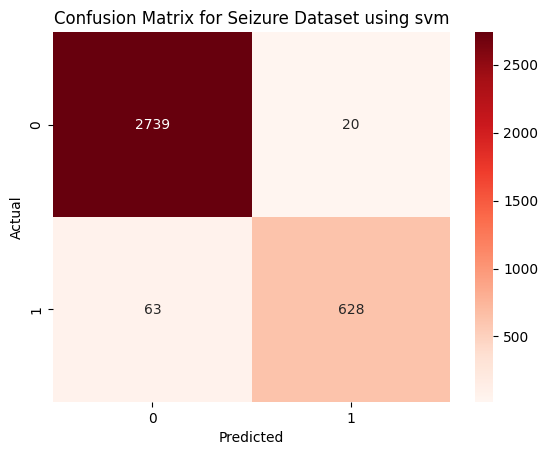

In [ ]:
# Assuming y_test are the true labels and predictions are the predicted labels
svm_cm = confusion_matrix(y_test, svm_predictions)
print(svm_cm)

plt.title('Confusion Matrix for Seizure Dataset using svm')
sn.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [ ]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2759
           1       0.97      0.91      0.94       691

    accuracy                           0.98      3450
   macro avg       0.97      0.95      0.96      3450
weighted avg       0.98      0.98      0.98      3450



In [ ]:
#print(classification_report(y_test, Rclfpredictions))

In [ ]:
# logistic regression 

logreg_model = LogisticRegression()
logreg_model.fit(x_train , y_train)

logreg_predictions = logreg_model.predict(x_test)


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Model Acuuracy for logistic regression :", logreg_accuracy)

Model Acuuracy for logistic regression : 0.8168115942028985


In [ ]:
# Create a KNeighborsClassifier object
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the KNeighborsClassifier model
knn_model.fit(x_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(x_test)

# Check the accuracy of the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Model Accuracy: ", knn_accuracy)


Model Accuracy:  0.9284057971014493


[[2757    2]
 [ 245  446]]


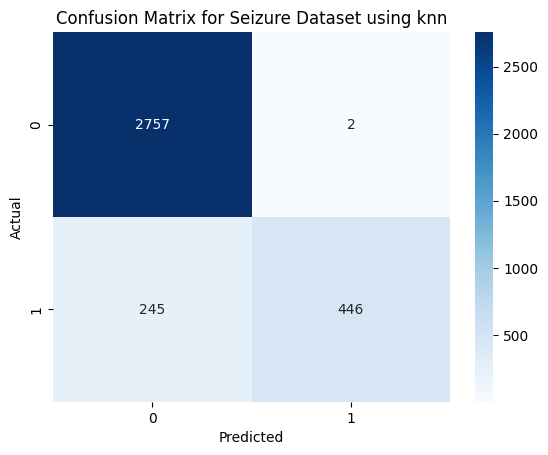

In [ ]:
knn_confusionmatrix = confusion_matrix(y_test,knn_predictions)
print(knn_confusionmatrix)


sn.heatmap(knn_confusionmatrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Seizure Dataset using knn')

plt.show()



In [ ]:

# Create a RandomForestClassifier object
Rclf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
Rclf_model.fit(x_train, y_train)


# Make predictions
Rclfpredictions = Rclf_model.predict(x_test)

# Measure accuracy
Rclf_accuracy = accuracy_score(y_test, Rclfpredictions)
print(Rclf_accuracy)

0.9797101449275363


[[2727   32]
 [  38  653]]


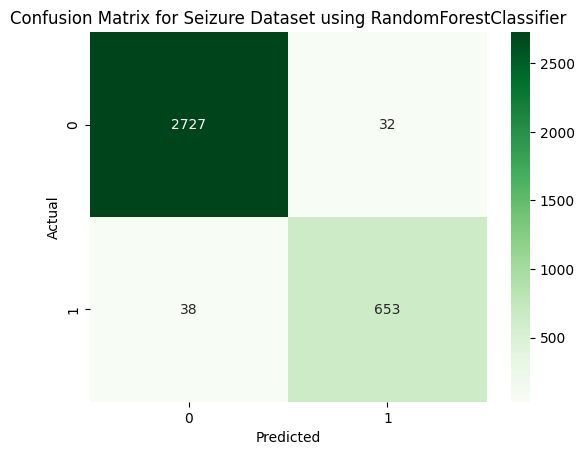

In [ ]:
Rfc_confusionmatrix = confusion_matrix(y_test,Rclfpredictions)
print(Rfc_confusionmatrix)


sn.heatmap(Rfc_confusionmatrix, annot=True, fmt="d", cmap="Greens")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Seizure Dataset using RandomForestClassifier')
plt.show()


In [ ]:

input_data =  (1, -2, -8, -11, -12, -17, -15, -16, -18, -17, -19, -18, -16, -15, -14, 
               -21, -19, -24, -24, -24, -17, -20, -23, -15, -17, -20, -18, -19, -20, -19, -18, -20, -25, -27,
               -24, -22, -20, -9, 0, 12, 18, 25, 23, 20, 17, 12, 6, -1, -5, -10, -13, -13, -17, -20, -20, -19, 
               -20, -21, -22, -24, -27, -29, -31, -36, -45, -49, -60, -71, -83, -89, -97, -103, -105, -103, -104,
               -97, -99, -99, -101, -96, -91, -78, -64, -48, -36, -23, -15, -14, -17, -18, -15, -14, -13, -12, -17,
               -21, -22, -23, -14, -12, -9, -12, -18, -16, -19, -23, -21, -18, -17, -15, -10, -7, -9, -7, -2, 0, 11, 
               18, 26, 30, 30, 39, 38, 28, 14, 4, -8, -9, -9, -8, -3, 3, 1, -4, -12, -15, -20, -25, -23, -20, -26, -24, 
               -25, -35, -41, -41, -53, -61, -58, -59, -55, -53, -65, -78, -87, -97, -100, -106, -104, -107, -110, -110, 
               -109, -104, -118, -111, -102, -80, -67, -79, -91, -97, -88, -76, -72, -66, -57, -39)

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data

std_data = scaler.transform(input_data_reshaped)


prediction = svc_model.predict(std_data)
print(prediction)

[0]


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data =  (14, 6, -13, -16, 10, 26, 27, -9, 4, 14, -1, -10, 14, 44, 77, 61, 42, 32, 29, 22, 26, 35, 81, 66, 50, 57, 91, 121, 111, 73, 38, 23, 35, 21, 11, -12, 2, 17, 61, 88, 90, 76, 18, 5, 10, 23, 48, 32, 4, -35, -23, -7, 25, 20, 6, 0, 30, 33, 17, -18, -36, -6, 5, 26, 10, -9, -1, 15, 47, 74, 53, 17, -20, -42, -41, -49, -41, 2, 12, 17, 8, 9, 59, 47, 35, -9, -53, -53, -44, -29, -18, -12, 15, 67, 83, 82, 34, 13, 2, 9, -3, 3, 30, 61, 89, 115, 92, 70, 34, 33, 48, 39, 39, 37, 43, 50, 56, 29, 31, 47, 48, 49, 22, 11, -2, -8, 15, -1, -20, -43, -48, -44, -22, -17, 18, 50, 45, -9, -78, -90, -62, -38, -40, -21, -23, -11, 
               -4, -9, -22, -42, -49, -48, -40, -40, -46, -43, -67, -67, -50, -18, -14, -39, -74, -86, -75, -68, -57, -78, -42, -65, -48, -61, -62, -67, -30, -2, -1, -8)

input_data_as_numpy_array = np.asarray(input_data)        #11500 row   output expected 1

# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


# standardize the input data

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = Rclf_model.predict(std_data)
print(prediction)



[[ 0.16352921  0.10312205 -0.01741698 -0.03780657  0.12115231  0.21395158
   0.21795591 -0.00977106  0.07195645  0.13054812  0.03353345 -0.02012353
   0.1344676   0.32153842  0.52098054  0.41984387  0.30222763  0.24062747
   0.21858681  0.1775174   0.20157902  0.25886924  0.54174383  0.44734993
   0.34316199  0.38296988  0.5947578   0.78325752  0.72659069  0.50100345
   0.29445876  0.20410412  0.26919752  0.17046554  0.10183769 -0.0431073
   0.05797991  0.16743145  0.45041268  0.60918313  0.61934174  0.53168364
   0.15396187  0.06871505  0.10475645  0.18463333  0.32379894  0.23479765
   0.07052696 -0.17285931 -0.10394043 -0.007693    0.18659093  0.15522107
   0.07468794  0.04629499  0.24457776  0.2735927   0.17666019 -0.03490732
  -0.14500888  0.03285069  0.09861244  0.23363867  0.1244428   0.00182528
   0.05268734  0.14968014  0.3500381   0.51762967  0.38086012  0.15184731
  -0.08227821 -0.22173303 -0.20921629 -0.25307056 -0.20250347  0.05395156
   0.11198772  0.14994666  0.10532978  

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (386, 382, 356, 331, 320, 315, 307, 272, 244, 232, 237, 258, 212, 2, -267, -605, -850, -1001, -1109, -1090, -967, -746, -464, -152, 118, 318, 427, 473, 485, 447, 397, 339, 312, 314, 326, 335, 332, 324, 310, 312, 309, 309, 303, 297, 295, 295, 293, 286, 279, 283, 301, 308, 285, 252, 215, 194, 169, 111, -74, -388, -679, -892, -949, -972, -1001, -1006, -949, -847, -668, -432, -153, 72, 226, 326, 392, 461, 495, 513, 511, 496, 479, 453, 440, 427, 414, 399, 385, 385, 404, 432, 444, 437, 418, 392, 373, 363, 365, 372, 385, 388, 383, 371, 360, 353, 334, 303, 252, 200, 153, 151, 143, 48, -206, -548, -859, -1067, -1069, -957, -780, -597, -460, -357, -276, -224, -210, -350, -930, -1413, -1716, -1360, -662, -96, 243, 323, 241, 29, -167, -228, -136, 27, 146, 229, 269, 297, 307, 303, 305, 306, 307, 280, 231, 159, 85, 51, 43, 62, 63, 63, 69, 89, 123, 136, 127, 102, 95, 105, 131, 163, 168, 164, 150, 146, 152, 157, 156, 154, 143, 129)

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data

std_data = scaler.transform(input_data_reshaped)
print(std_data)


prediction = Rclf_model.predict(std_data)
print(prediction)

[[  2.56614607   2.46546309   2.28815558   2.14057014   2.06840877
    2.01808234   1.99433562   1.79969476   1.60121577   1.47982103
    1.48599504   1.65535769   1.37742863   0.06130049  -1.60342489
   -3.7294755   -5.37207721  -6.3485894   -6.93988721  -6.77330572
   -5.93908869  -4.5667218   -2.8131974   -0.87691446   0.75294207
    1.9711304    2.66726154   2.96422092   3.0331682    2.79873026
    2.49493121   2.15052039   1.97116112   1.97662771   2.07713771
    2.19236609   2.20214032   2.14104418   2.02596388   1.99844189
    1.98228573   2.01257416   1.95792304   1.89794484   1.84318308
    1.78194058   1.7201676    1.69723459   1.7196325    1.80932968
    1.9465813    1.97390553   1.79349647   1.59498817   1.36996507
    1.26154534   1.11500999   0.7655035   -0.38864881  -2.2792505
   -4.02231193  -5.44113022  -6.08601598  -6.3258931   -6.39733289
   -6.20206601  -5.69281836  -5.122293    -4.09643661  -2.64348274
   -0.90343144   0.495072     1.48470603   2.17732154   2.60882

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (386, 382, 356, 331, 320, 315, 307, 272, 244, 232, 237, 258, 212, 2, -267, -605, -850, -1001, -1109, -1090, -967, -746, -464, -152, 118, 318, 427, 473, 485, 447, 397, 339, 312, 314, 326, 335, 332, 324, 310, 312, 309, 309, 303, 297, 295, 295, 293, 286, 279, 283, 301, 308, 285, 252, 215, 194, 169, 111, -74, -388, -679, -892, -949, -972, -1001, -1006, -949, -847, -668, -432, -153, 72, 226, 326, 392, 461, 495, 513, 511, 496, 479, 453, 440, 427, 414, 399, 385, 385, 404, 432, 444, 437, 418, 392, 373, 363, 365, 372, 385, 388, 383, 371, 360, 353, 334, 303, 252, 200, 153, 151, 143, 48, -206, -548, -859, -1067, -1069, -957, -780, -597, -460, -357, -276, -224, -210, -350, -930, -1413, -1716, -1360, -662, -96, 243, 323, 241, 29, -167, -228, -136, 27, 146, 229, 269, 297, 307, 303, 305, 306, 307, 280, 231, 159, 85, 51, 43, 62, 63, 63, 69, 89, 123, 136, 127, 102, 95, 105, 131, 163, 168, 164, 150, 146, 152, 157, 156, 154, 143, 129)

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data

std_data = scaler.transform(input_data_reshaped)
print(std_data)


prediction = Rclf_model.predict(std_data)
print(prediction,"is random forest")




[[  2.56614607   2.46546309   2.28815558   2.14057014   2.06840877
    2.01808234   1.99433562   1.79969476   1.60121577   1.47982103
    1.48599504   1.65535769   1.37742863   0.06130049  -1.60342489
   -3.7294755   -5.37207721  -6.3485894   -6.93988721  -6.77330572
   -5.93908869  -4.5667218   -2.8131974   -0.87691446   0.75294207
    1.9711304    2.66726154   2.96422092   3.0331682    2.79873026
    2.49493121   2.15052039   1.97116112   1.97662771   2.07713771
    2.19236609   2.20214032   2.14104418   2.02596388   1.99844189
    1.98228573   2.01257416   1.95792304   1.89794484   1.84318308
    1.78194058   1.7201676    1.69723459   1.7196325    1.80932968
    1.9465813    1.97390553   1.79349647   1.59498817   1.36996507
    1.26154534   1.11500999   0.7655035   -0.38864881  -2.2792505
   -4.02231193  -5.44113022  -6.08601598  -6.3258931   -6.39733289
   -6.20206601  -5.69281836  -5.122293    -4.09643661  -2.64348274
   -0.90343144   0.495072     1.48470603   2.17732154   2.60882

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
input_data =  (-278, -246, -215, -191, -177, -167, -157, -139, -118, -92, -63, -39, -11, 14, 36, 60, 70, 78, 79, 69, 27,
               -45, -123, -183, -218, -242, -256, -256, -236, -205, -165, -125, -84, -41, -10, 12, 35, 58, 71, 85, 98,
               107, 106, 97, 77, 46, -2, -77, -130, -142, -141, -120, -144, -170, -189, -215, -237, -242, -236, -208, 
               -163, -98, -28, 29, 70, 92, 102, 113, 122, 129, 125, 123, 118, 117, 116, 116, 108, 88, 62, 22, -27, -85, 
               -90, -71, -47, -55, -107, -169, -194, -210, -202, -186, -145, -99, -53, -17, 1, 15, 23, 33, 44, 56, 77,
               100, 123, 144, 155, 158, 154, 151, 152, 146, 143, 131, 119, 93, 39, -63, -203, -315, -352, -311, -254,
               -207, -188, -180, -170, -149, -120, -87, -45, -3, 29, 45, 52, 50, 51, 59, 64, 74, 79, 81, 76, 65, 63,
               62, 65, 67, 70, 63, 45, 20, -11, -32, -26, 3, 40, 85, 124, 182, 248, 349, 418, 419, 291, 73, -152, -311, 
               -386, -400, -379, -336, -281, -226, -174, -125, -79, -40)

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data

std_data = scaler.transform(input_data_reshaped)
print(std_data)

#prediction = svc_model.predict(std_data)
#prediction = logreg_model.predict(std_data)
prediction = Rclf_model.predict(std_data) 
#prediction = knn_model.predict(std_data)
print(prediction)

[[-1.72239585 -1.48014907 -1.27954614 -1.13641154 -1.05348304 -0.99088315
  -0.94937933 -0.84689048 -0.70541703 -0.52552036 -0.3448389  -0.20142561
  -0.02247192  0.13565419  0.26778105  0.41361366  0.48034482  0.53404855
   0.53310675  0.47130219  0.20776298 -0.23542946 -0.71405069 -1.06522728
  -1.27185361 -1.43641706 -1.54559577 -1.55260385 -1.4134692  -1.20693251
  -0.94981953 -0.70750857 -0.46197096 -0.21172577 -0.02984898  0.11150757
   0.27239595  0.4310084   0.51368783  0.59057699  0.66912965  0.72871199
   0.71097444  0.64504772  0.5134392   0.31969975  0.03882574 -0.39278356
  -0.73303719 -0.83982227 -0.85073538 -0.71855215 -0.85789767 -1.02389854
  -1.13382422 -1.30050308 -1.4274036  -1.46070818 -1.39502306 -1.18740787
  -0.91082146 -0.53555365 -0.11532125  0.2533567   0.5114918   0.63030374
   0.67693532  0.749046    0.81645153  0.86122884  0.82973873  0.81333489
   0.79676173  0.814815    0.81256795  0.78509797  0.71423797  0.57744651
   0.42186216  0.18152845 -0.11199996 

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data =  (-278, -246, -215, -191, -177, -167, -157, -139, -118, -92, -63, -39, -11, 14, 36, 60, 70, 78, 79, 69, 27,
               -45, -123, -183, -218, -242, -256, -256, -236, -205, -165, -125, -84, -41, -10, 12, 35, 58, 71, 85, 98,
               107, 106, 97, 77, 46, -2, -77, -130, -142, -141, -120, -144, -170, -189, -215, -237, -242, -236, -208, 
               -163, -98, -28, 29, 70, 92, 102, 113, 122, 129, 125, 123, 118, 117, 116, 116, 108, 88, 62, 22, -27, -85, 
               -90, -71, -47, -55, -107, -169, -194, -210, -202, -186, -145, -99, -53, -17, 1, 15, 23, 33, 44, 56, 77,
               100, 123, 144, 155, 158, 154, 151, 152, 146, 143, 131, 119, 93, 39, -63, -203, -315, -352, -311, -254,
               -207, -188, -180, -170, -149, -120, -87, -45, -3, 29, 45, 52, 50, 51, 59, 64, 74, 79, 81, 76, 65, 63,
               62, 65, 67, 70, 63, 45, 20, -11, -32, -26, 3, 40, 85, 124, 182, 248, 349, 418, 419, 291, 73, -152, -311, 
               -386, -400, -379, -336, -281, -226, -174, -125, -79, -40)

# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array to have multiple features (1 sample, 178 features)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

# Make predictions using the model
prediction = Rclf_model.predict(std_data)
print(prediction)


[[-1.72239585 -1.48014907 -1.27954614 -1.13641154 -1.05348304 -0.99088315
  -0.94937933 -0.84689048 -0.70541703 -0.52552036 -0.3448389  -0.20142561
  -0.02247192  0.13565419  0.26778105  0.41361366  0.48034482  0.53404855
   0.53310675  0.47130219  0.20776298 -0.23542946 -0.71405069 -1.06522728
  -1.27185361 -1.43641706 -1.54559577 -1.55260385 -1.4134692  -1.20693251
  -0.94981953 -0.70750857 -0.46197096 -0.21172577 -0.02984898  0.11150757
   0.27239595  0.4310084   0.51368783  0.59057699  0.66912965  0.72871199
   0.71097444  0.64504772  0.5134392   0.31969975  0.03882574 -0.39278356
  -0.73303719 -0.83982227 -0.85073538 -0.71855215 -0.85789767 -1.02389854
  -1.13382422 -1.30050308 -1.4274036  -1.46070818 -1.39502306 -1.18740787
  -0.91082146 -0.53555365 -0.11532125  0.2533567   0.5114918   0.63030374
   0.67693532  0.749046    0.81645153  0.86122884  0.82973873  0.81333489
   0.79676173  0.814815    0.81256795  0.78509797  0.71423797  0.57744651
   0.42186216  0.18152845 -0.11199996 

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
!pip3 install mne

Extracting EDF parameters from C:\Users\91994\Downloads\archive (3)\PN00-5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1097215  =      0.000 ...  2142.998 secs...


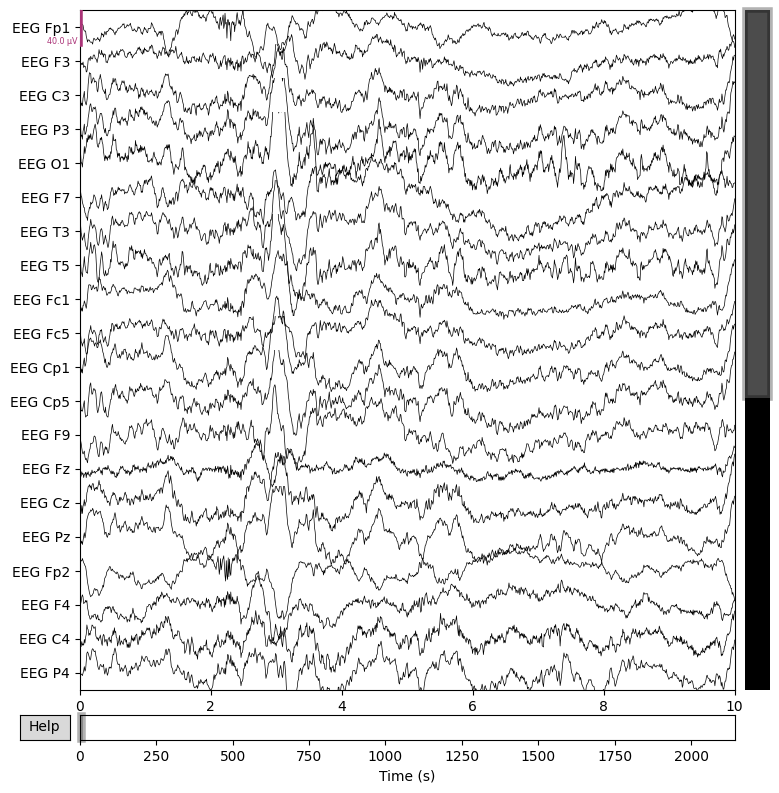

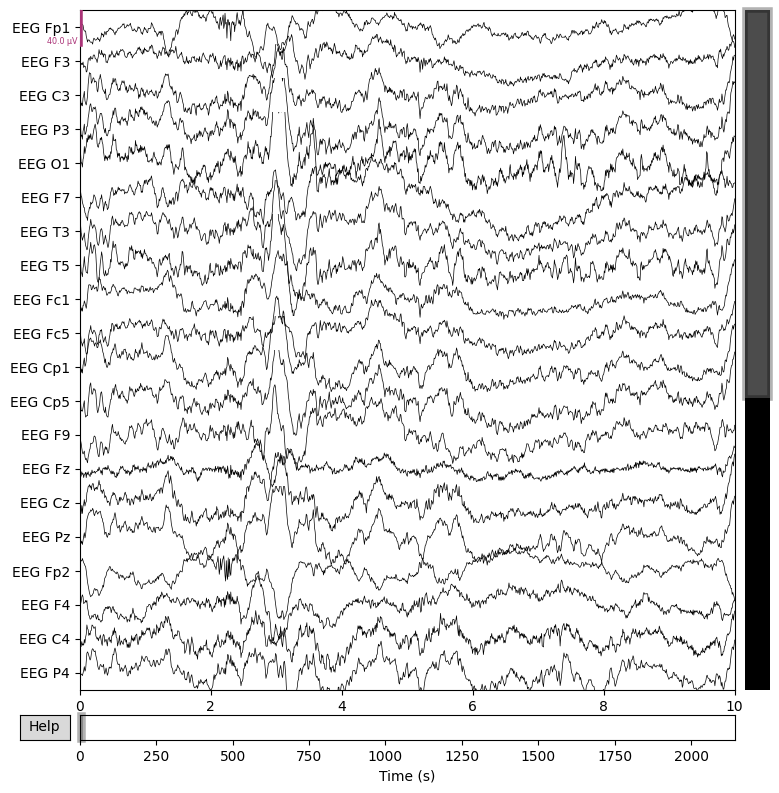

In [ ]:

import mne

raw = mne.io.read_raw_edf("C:/Users/91994/Downloads/archive (3)/PN00-5.edf", preload = True)

raw.plot()



In [ ]:
raw.filter(l_freq=0.5, h_freq=50) 

raw.notch_filter(freqs=60) 
print(raw)


eeg_data = raw.get_data()


print(eeg_data)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


<RawEDF | PN00-5.edf, 35 x 1097216 (2143.0 s), ~293.0 MB, data loaded>
[[ 3.38813179e-21  3.87577404e-07  8.88704018e-07 ...  1.76526450e-06
   1.05928278e-06 -1.48230766e-21]
 [-6.77626358e-21  8.70724424e-07  1.57606997e-06 ...  1.70436743e-06
   8.43030410e-07 -6.35274710e-22]
 [-2.54109884e-21  8.54113743e-07  1.41670025e-06 ...  2.07145242e-06
   1.13192867e-06 -2.11758237e-21]
 ...
 [ 6.77626358e-21  3.21967525e-06  6.29015321e-06 ...  3.90590570e-06
   2.19357510e-06 -9.74087889e-21]
 [-2.84603070e-19  6.22005513e-06  1.18769828e-05 ...  1.62023413e-06
   1.44576539e-06  3.72694497e-19]
 [ 3.21607822e-21  4.45734432e-21  4.40389563e-21 ...  6.85039957e-21
   6.80864298e-21  8.34162965e-21]]


In [ ]:
eeg_data.shape


(35, 1097216)

In [ ]:
raw.set_eeg_reference()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Measurement date,"January 01, 2016 22:22:04 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,35 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,5.31 Hz
Lowpass,30.00 Hz


In [ ]:

print("Available channels (electrodes): ", raw.info["ch_names"])

Available channels (electrodes):  ['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'EKG EKG', 'SPO2', 'HR', '1', '2', 'MK']


In [ ]:
user_channel_name = "EEG Fp1"
user_channel_index = raw.info["ch_names"].index(user_channel_name)

In [ ]:
print(user_channel_index)

0


In [ ]:
user_eeg_data = raw.get_data()[user_channel_index]

len(user_eeg_data)
user_eeg_data.shape

(1097216,)

In [ ]:


sampling_rate = raw.info["sfreq"]
print(sampling_rate)


512.0


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
standardized_data = scaler.fit_transform(user_eeg_data.reshape(-1, 1))

print(len(standardized_data))


chunk_size = 178
num_chunks = len(standardized_data) // chunk_size
reshaped_data = standardized_data[:num_chunks * chunk_size].reshape(num_chunks, chunk_size)

print(f"Reshaped data shape: {reshaped_data.shape}")

1097216
Reshaped data shape: (6164, 178)


In [ ]:


prediction = svc_model.predict(reshaped_data)
print(prediction)

prediction.shape

[0 1 0 ... 1 0 0]


(6164,)

In [ ]:
prediction2= Rclf_model.predict(reshaped_data)
print(prediction2)

prediction2.shape

binary_predictions = (prediction2 >= 0.5).astype(int)


num_ones = np.sum(binary_predictions)
num_zeros = len(binary_predictions) - num_ones

print(f"Number of ones (seizure): {num_ones}")
print(f"Number of zeros (no seizure): {num_zeros}")

[0 0 0 ... 1 0 0]
Number of ones (seizure): 2222
Number of zeros (no seizure): 3942


[0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0]


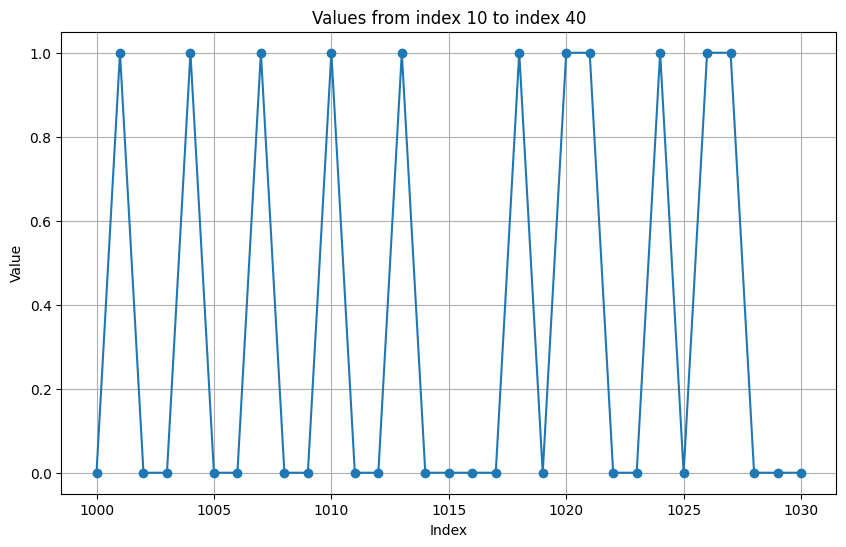

In [ ]:
import matplotlib.pyplot as plt

# Extract values from index 10 to index 40 (in Python indexing, it's 9 to 39)
values_to_plot = prediction2[999:1030]
print(values_to_plot)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1000, 1031), values_to_plot, marker='o', linestyle='-')
plt.title('Values from index 10 to index 40')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np




binary_predictions = (prediction2 >= 0.5).astype(int)


num_ones = np.sum(binary_predictions)
num_zeros = len(binary_predictions) - num_ones

print(f"Number of ones (seizure): {num_ones}")
print(f"Number of zeros (no seizure): {num_zeros}")

Number of ones (seizure): 2222
Number of zeros (no seizure): 3942


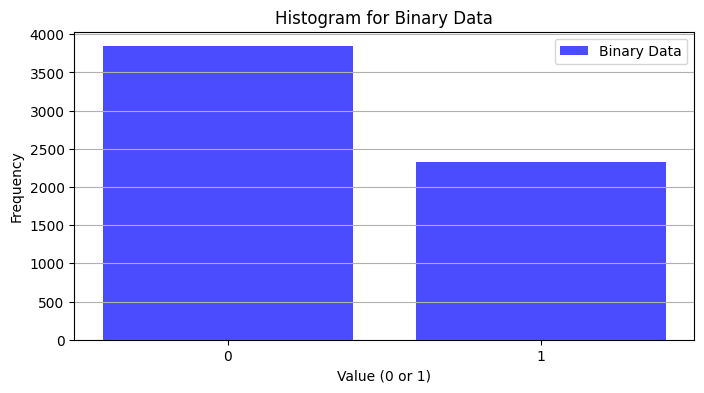

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 4))  
plt.hist(prediction, bins=[-0.5, 0.5, 1.5], color='blue', alpha=0.7, rwidth=0.8, align='mid', label='Binary Data')

plt.xlabel('Value (0 or 1)')
plt.ylabel('Frequency')
plt.title('Histogram for Binary Data')
plt.xticks([0, 1])
plt.grid(axis='y')  
plt.legend() 


plt.show()



In [ ]:
reshaped_data
reshaped_data.shape

(6164, 178)

In [ ]:
prediction3 = Rclf_model.predict(x)
print(prediction)


[0 1 0 ... 0 0 0]


In [ ]:
import numpy as np

# Assuming prediction is your array of predictions
prediction = Rclf_model.predict(x)

# Count the number of ones (seizure) and zeros (no seizure)
num_ones = np.sum(prediction == 1)
num_zeros = np.sum(prediction == 0)

print(f"Number of ones (seizure): {num_ones}")
print(f"Number of zeros (no seizure): {num_zeros}")

Number of ones (seizure): 2285
Number of zeros (no seizure): 9215


In [ ]:


# Save KNeighborsClassifier model using pickle
with open('Rclfmodel.pkl', 'wb') as f:
    pickle.dump(Rclf_model, f)

